# Summary

By the end of this notebook we will download all the air quality data for British Columbia and contrast how they have increased overtime along with at what locations are they the highest.

This will be done per pollutant, and we will look through the entire recorded period of time along with recent history.

In [1]:
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import datetime
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

ModuleNotFoundError: No module named 'seaborn'

# Downloading the data

From the OpenAQ public dataset, we will be downloading the location, province (called city in the table), country, pollutant, value for the pollutant, unit for value, and the timestamp for that measurement from the the Google Bigquery public dataset.

In [2]:
client=bigquery.Client()
QUERY = ('SELECT location, city AS province, country, pollutant, value, timestamp, unit FROM `bigquery-public-data.openaq.global_air_quality` WHERE country = "CA"')
query_job = client.query(QUERY) #API request
rows = query_job.result() # Waits for query to finish

Look and check at the first 5 rows of the table and see N/A values for province

In [3]:
OpenAQ_Canada_df = query_job.to_dataframe()
OpenAQ_Canada_df.head()

,location,province,country,pollutant,value,timestamp,unit
0,Downtown Vancouver,N/A,CA,co,0.20,2022-05-08 11:00:00+00:00,ppm
1,Rocky Point Park,BRITISH COLUMBIA,CA,co,0.15,2022-05-23 10:00:00+00:00,ppm
2,Downtown Vancouver,N/A,CA,co,0.19,2022-05-13 12:00:00+00:00,ppm
3,Rocky Point Park,BRITISH COLUMBIA,CA,co,0.20,2022-04-29 06:00:00+00:00,ppm
4,Rocky Point Park,BRITISH COLUMBIA,CA,co,0.12,2022-04-30 20:00:00+00:00,ppm


# Dealing with null values

As seen we have null values for province so first we need to count just how many null values we have

In [6]:
OpenAQ_Canada_df['province'].value_counts()

BRITISH COLUMBIA         75415
N/A                      56979
ALBERTA                  31654
QUEBEC                   29573
ONTARIO                  24351
NOVA SCOTIA              13605
NEW BRUNSWICK            13268
NEWFOUNDLAND             10289
PRINCE EDWARD ISLAND      4799
SASKATCHEWAN              4281
MANITOBA                  1908
NORTHWEST TERRITORIES      811
Name: province, dtype: int64

So there are a sizeable number of null values so we have to see which locations have province recorded as null, but only for British Columbia as that is the province we are looking at.

In [7]:
aqc_nan = OpenAQ_Canada_df.loc[OpenAQ_Canada_df['province'] == "N/A"]
aqc_nan.location.unique()

array(['Downtown Vancouver', 'Flat Valley', 'Radisson', 'Whitehorse NAPS',
       'Saguenay - Parc Powe', 'Toronto Downtown', 'Québec - Charlesbour',
       'Gibbons', 'Second Narrows', 'Redwater', 'Horseshoe Bay',
       'Burnaby North', 'Warfield Elementary', 'Capitol Hill',
       'Trail Columbia Garde', 'Birchbank Golf Cours',
       'Quesnel Kinchant St', 'Chenier', 'Elkford Rocky Mounta',
       'Hochelaga', 'St-Dominique', 'York-Roberval', 'Toronto',
       'Kitimat Industrial A', 'Valemount', 'Anzac', 'Duncan', 'Molson',
       'Airdrie', 'Janvier', 'Ardrossan', 'Miramichi', 'St Albert',
       'Caserne 17', 'Conklin East', 'Conklin West', 'Burnaby Mountain',
       'Fort MacKay West', 'Kelowna KLO Road', 'Saint-Jean-Baptiste',
       'Sparwood Centennial', 'AJ Ottewell Communit',
       'Cranbrook Muriel Bax', 'Edmonton Central Eas',
       'Quesnel Johnston Ave', 'Sainte-Anne-de-Belle',
       'Smithers Muheim Memo', 'Rivière-des-Prairies',
       'Aéroport de Montréal'], dty

As we see there is a sizeable number of location recorded as null values.

We do not have table to join and replace the null values with and we don't want to dump a sizeable number of locations for simply not having a province assigned to them so we have to add them manually using pandas loc function. 

In [8]:
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Downtown Vancouver", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Birchbank Golf Cours", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Burnaby Mountain", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Burnaby North", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Cranbrook Muriel Bax", 'province'] = "BRITISH COLUMBIA"

OpenAQ_Canada_df['province'].value_counts()

BRITISH COLUMBIA         80786
N/A                      51608
ALBERTA                  31654
QUEBEC                   29573
ONTARIO                  24351
NOVA SCOTIA              13605
NEW BRUNSWICK            13268
NEWFOUNDLAND             10289
PRINCE EDWARD ISLAND      4799
SASKATCHEWAN              4281
MANITOBA                  1908
NORTHWEST TERRITORIES      811
Name: province, dtype: int64

In [9]:
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Duncan", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Elkford Rocky Mounta", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Horseshoe Bay", 'province'] = "BRITISH COLUMBIA"

OpenAQ_Canada_df['province'].value_counts()

BRITISH COLUMBIA         84453
N/A                      47942
ALBERTA                  31654
QUEBEC                   29572
ONTARIO                  24351
NOVA SCOTIA              13605
NEW BRUNSWICK            13268
NEWFOUNDLAND             10289
PRINCE EDWARD ISLAND      4799
SASKATCHEWAN              4281
MANITOBA                  1908
NORTHWEST TERRITORIES      811
Name: province, dtype: int64

In [10]:
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Kelowna KLO Road", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Kitimat Industrial A", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Quesnel Johnston Ave", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Quesnel Kinchant St", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Second Narrows", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Smithers Muheim Memo", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Sparwood Centennial", 'province'] = "BRITISH COLUMBIA"

OpenAQ_Canada_df['province'].value_counts()

BRITISH COLUMBIA         94766
N/A                      37629
ALBERTA                  31654
QUEBEC                   29572
ONTARIO                  24351
NOVA SCOTIA              13605
NEW BRUNSWICK            13268
NEWFOUNDLAND             10289
PRINCE EDWARD ISLAND      4799
SASKATCHEWAN              4281
MANITOBA                  1908
NORTHWEST TERRITORIES      811
Name: province, dtype: int64

In [11]:

OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Trail Columbia Garde", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Valemount", 'province'] = "BRITISH COLUMBIA"
OpenAQ_Canada_df.loc[OpenAQ_Canada_df['location'] == "Warfield Elementary", 'province'] = "BRITISH COLUMBIA"

OpenAQ_Canada_df['province'].value_counts()

BRITISH COLUMBIA         95695
N/A                      36700
ALBERTA                  31654
QUEBEC                   29572
ONTARIO                  24351
NOVA SCOTIA              13605
NEW BRUNSWICK            13268
NEWFOUNDLAND             10289
PRINCE EDWARD ISLAND      4799
SASKATCHEWAN              4281
MANITOBA                  1908
NORTHWEST TERRITORIES      811
Name: province, dtype: int64

In [12]:
OpenAQ_Canada_df['timestamp'].head()

0   2022-05-08 11:00:00+00:00
1   2022-05-23 10:00:00+00:00
2   2022-05-13 12:00:00+00:00
3   2022-04-29 06:00:00+00:00
4   2022-04-30 20:00:00+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

# Plotting the data for British Columbia

First we are going to look at the different pollutants and their levels over time for the province of British Columbia.

For this we will need values for pollutant concentrations along with timestamps at which the measurements were taken. First for the entire time period then again for recent condensed history.

After we will see which locations have the greatest values for each pollutant.

In [13]:
BC_averages=OpenAQ_Canada_df.loc[OpenAQ_Canada_df.province.isin(['BRITISH COLUMBIA'])]
BC_averages.head()

,location,province,country,pollutant,value,timestamp,unit
0,Downtown Vancouver,BRITISH COLUMBIA,CA,co,0.20,2022-05-08 11:00:00+00:00,ppm
1,Rocky Point Park,BRITISH COLUMBIA,CA,co,0.15,2022-05-23 10:00:00+00:00,ppm
2,Downtown Vancouver,BRITISH COLUMBIA,CA,co,0.19,2022-05-13 12:00:00+00:00,ppm
3,Rocky Point Park,BRITISH COLUMBIA,CA,co,0.20,2022-04-29 06:00:00+00:00,ppm
4,Rocky Point Park,BRITISH COLUMBIA,CA,co,0.12,2022-04-30 20:00:00+00:00,ppm


We also have to see which pollutants are present in the data.

In [14]:
BC_averages.pollutant.unique()

array(['co', 'o3', 'no2', 'so2', 'pm10', 'pm25'], dtype=object)

In [15]:
BC_CO = BC_averages.loc[BC_averages.pollutant=="co"]
BC_O3 = BC_averages.loc[BC_averages.pollutant=="o3"]
BC_NO2 = BC_averages.loc[BC_averages.pollutant=="no2"]
BC_SO2 = BC_averages.loc[BC_averages.pollutant=="so2"]
BC_pm10 = BC_averages.loc[BC_averages.pollutant=="pm10"]
BC_pm25 = BC_averages.loc[BC_averages.pollutant=="pm25"]

See which units are used for measurements

In [16]:
BC_averages.unit.unique()

array(['ppm', 'µg/m³'], dtype=object)

Now we have to find which are measured in ppm and which are in µg/m³.

In [17]:
BC_ppm = BC_averages.loc[BC_averages.unit=="ppm"]
BC_ppm.pollutant.unique()

array(['co', 'o3', 'no2', 'so2'], dtype=object)

CO, O3, NO2, and SO2 are measured using ppm units which means pm10 and pm25 are measured using µg/m³.

Now we plot CO, O3, NO2, and SO2 concentration over time.

Text(0, 0.5, 'Concentration (ppm)')

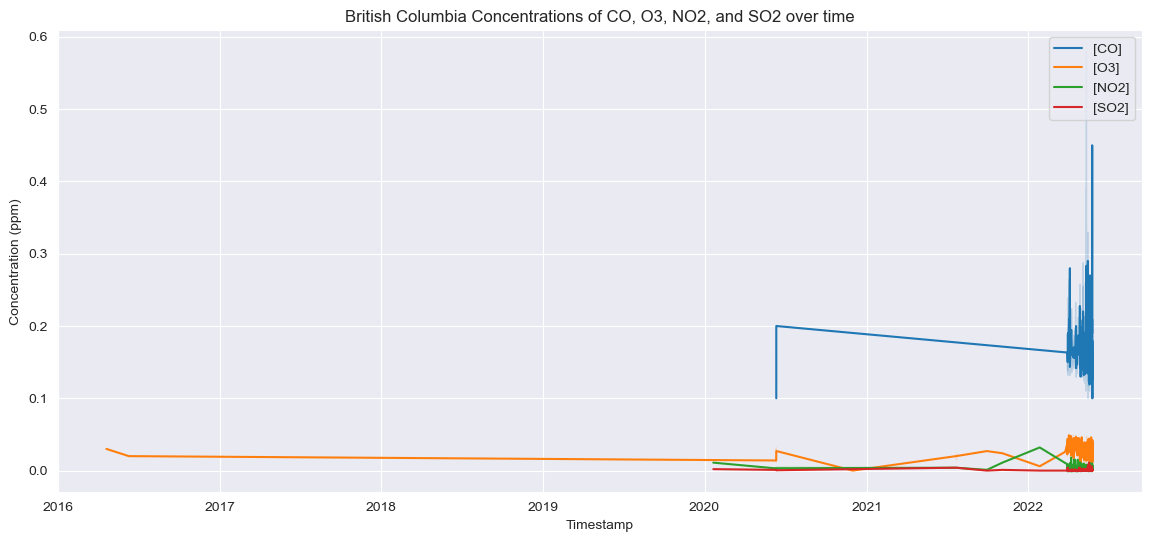

In [18]:
plt.figure(figsize=(14,6))

plt.title("British Columbia Concentrations of CO, O3, NO2, and SO2 over time")

sns.lineplot(data=BC_CO['value'],x=BC_CO['timestamp'],y=BC_CO['value'],label="[CO]")
sns.lineplot(data=BC_O3['value'],x=BC_O3['timestamp'],y=BC_O3['value'],label="[O3]")
sns.lineplot(data=BC_NO2['value'],x=BC_NO2['timestamp'],y=BC_NO2['value'],label="[NO2]")
sns.lineplot(data=BC_SO2['value'],x=BC_SO2['timestamp'],y=BC_SO2['value'],label="[SO2]")

plt.xlabel("Timestamp")

plt.ylabel("Concentration (ppm)")

As you can see the concentrations for all there pollutants have been relatively consistent since they were first started recording, with [CO] having the greatest variability out of them all.

Now for [pm10] and [pm25].

Text(0, 0.5, 'Concentration (µg/m³)')

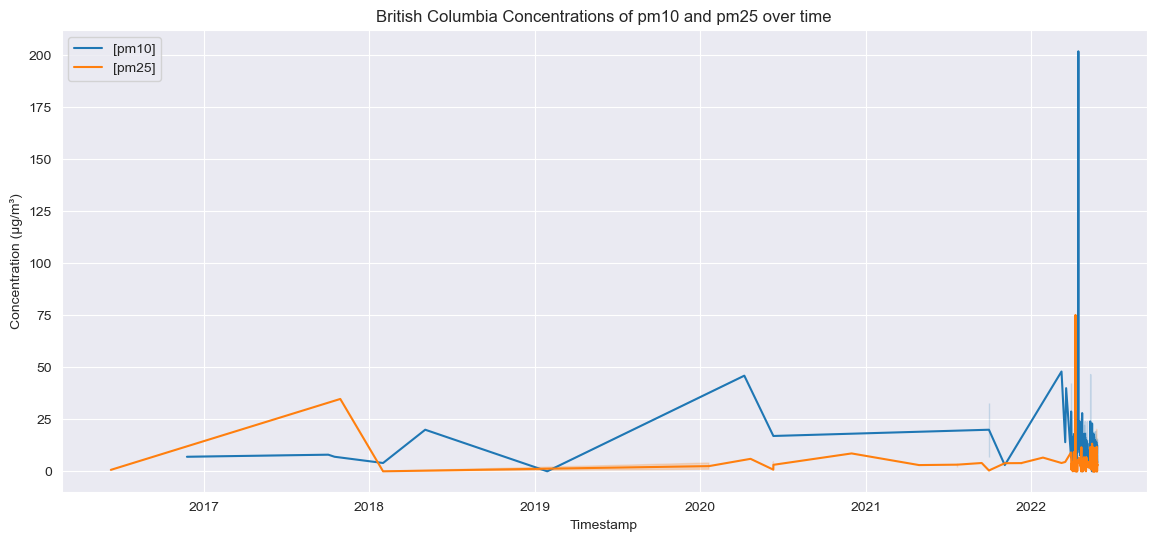

In [19]:
plt.figure(figsize=(14,6))

plt.title("British Columbia Concentrations of pm10 and pm25 over time")

sns.lineplot(data=BC_pm10['value'],x=BC_pm10['timestamp'],y=BC_pm10['value'],label="[pm10]")
sns.lineplot(data=BC_pm25['value'],x=BC_pm25['timestamp'],y=BC_pm25['value'],label="[pm25]")


plt.xlabel("Timestamp")

plt.ylabel("Concentration (µg/m³)")

Both pm10 and pm25 concentrations stayed relatively the same only until past 2022 where their variability became much greater. 

As all pollutants seem to have greater concentration of data along with greater number of measurements past 2022, we should limit the data to 2022 to present. 

In [70]:
BC_CO_2022 = BC_CO.loc[BC_CO.timestamp>='2022-04-01 00:00:00+00:00']
BC_O3_2022 = BC_O3.loc[BC_O3.timestamp>='2022-04-01 00:00:00+00:00']
BC_NO2_2022 = BC_NO2.loc[BC_NO2.timestamp>='2022-04-01 00:00:00+00:00']
BC_SO2_2022 = BC_SO2.loc[BC_SO2.timestamp>='2022-04-01 00:00:00+00:00']
BC_pm10_2022 = BC_pm10.loc[BC_pm10.timestamp>='2022-04-01 00:00:00+00:00']
BC_pm25_2022 = BC_pm25.loc[BC_pm25.timestamp>='2022-04-01 00:00:00+00:00']


Now we plot for CO, O3, NO2, and SO2 concentration over time.

Text(0, 0.5, 'Concentration (ppm)')

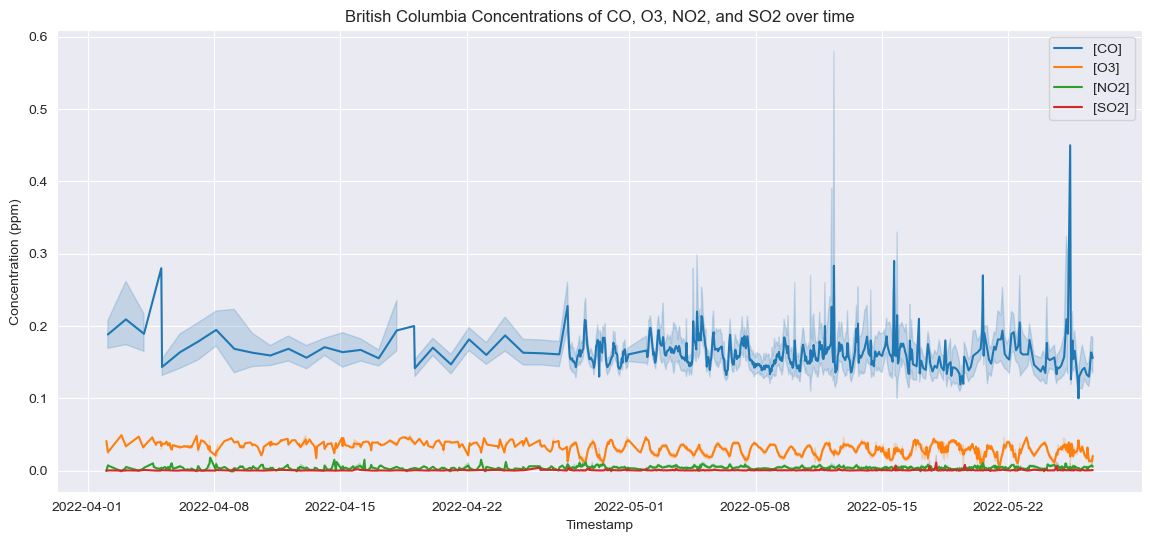

In [71]:
plt.figure(figsize=(14,6))

plt.title("British Columbia Concentrations of CO, O3, NO2, and SO2 over time")

sns.lineplot(data=BC_CO_2022['value'],x=BC_CO_2022['timestamp'],y=BC_CO_2022['value'],label="[CO]")
sns.lineplot(data=BC_O3_2022['value'],x=BC_O3_2022['timestamp'],y=BC_O3_2022['value'],label="[O3]")
sns.lineplot(data=BC_NO2_2022['value'],x=BC_NO2_2022['timestamp'],y=BC_NO2_2022['value'],label="[NO2]")
sns.lineplot(data=BC_SO2_2022['value'],x=BC_SO2_2022['timestamp'],y=BC_SO2_2022['value'],label="[SO2]")

plt.xlabel("Timestamp")

plt.ylabel("Concentration (ppm)")

Even using a time period with a greater number of measurements, we still have relatively stable concentrations for all 4 of these pollutants.

Now for pm10 and pm25.

Text(0, 0.5, 'Concentration (µg/m³)')

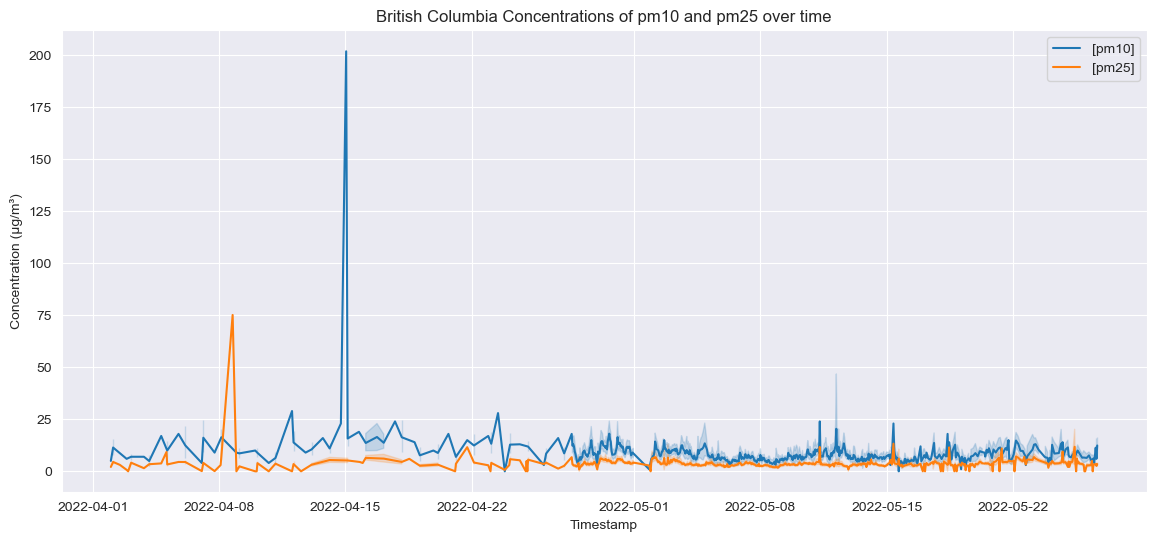

In [72]:
plt.figure(figsize=(14,6))

plt.title("British Columbia Concentrations of pm10 and pm25 over time")

sns.lineplot(data=BC_pm10_2022['value'],x=BC_pm10_2022['timestamp'],y=BC_pm10_2022['value'],label="[pm10]")
sns.lineplot(data=BC_pm25_2022['value'],x=BC_pm25_2022['timestamp'],y=BC_pm25_2022['value'],label="[pm25]")


plt.xlabel("Timestamp")

plt.ylabel("Concentration (µg/m³)")

So far we have seen that the concentrations have been relatively stable over a long period of time. However, we still have yet to figure out which locations have the greatest values for each pollutant along with lowest.

In [73]:
BC_CO_location = BC_CO.sort_values('value')
BC_CO_location

,location,province,country,pollutant,value,timestamp,unit
213840,Abbotsford Airport,BRITISH COLUMBIA,CA,co,0.08,2022-05-16 14:00:00+00:00,ppm
211661,Abbotsford Airport,BRITISH COLUMBIA,CA,co,0.08,2022-05-19 19:00:00+00:00,ppm
213176,Abbotsford Airport,BRITISH COLUMBIA,CA,co,0.08,2022-05-16 11:00:00+00:00,ppm
213900,Abbotsford Airport,BRITISH COLUMBIA,CA,co,0.09,2022-05-08 14:00:00+00:00,ppm
213106,Abbotsford Airport,BRITISH COLUMBIA,CA,co,0.09,2022-05-08 11:00:00+00:00,ppm
...,...,...,...,...,...,...,...
161609,Maple Ridge,BRITISH COLUMBIA,CA,co,0.55,2022-05-04 18:00:00+00:00,ppm
112817,Duncan,BRITISH COLUMBIA,CA,co,0.58,2022-05-12 08:00:00+00:00,ppm
112807,Duncan,BRITISH COLUMBIA,CA,co,0.58,2022-05-12 03:00:00+00:00,ppm
113269,Duncan,BRITISH COLUMBIA,CA,co,0.77,2022-05-25 07:00:00+00:00,ppm


For CO Abbotsford Aiport has the lowest at 0.08 ppm while Duncan has the highest with the greatest measurement at 0.91 ppm of [CO].

In [75]:
BC_O3_location = BC_O3.sort_values('value')
BC_O3_location

,location,province,country,pollutant,value,timestamp,unit
4368,Downtown Vancouver,BRITISH COLUMBIA,CA,o3,0.000,2022-05-10 07:00:00+00:00,ppm
107634,Hope,BRITISH COLUMBIA,CA,o3,0.000,2022-05-16 11:00:00+00:00,ppm
256695,TERRACE SKEENA MIDDL,BRITISH COLUMBIA,CA,o3,0.000,2022-05-09 13:00:00+00:00,ppm
86898,Downtown Vancouver,BRITISH COLUMBIA,CA,o3,0.000,2022-05-07 13:00:00+00:00,ppm
2083,Downtown Vancouver,BRITISH COLUMBIA,CA,o3,0.000,2022-05-07 14:00:00+00:00,ppm
...,...,...,...,...,...,...,...
114434,Duncan,BRITISH COLUMBIA,CA,o3,0.057,2022-05-10 20:00:00+00:00,ppm
113881,Duncan,BRITISH COLUMBIA,CA,o3,0.057,2022-05-10 21:00:00+00:00,ppm
114378,Duncan,BRITISH COLUMBIA,CA,o3,0.058,2022-05-12 18:00:00+00:00,ppm
113916,Duncan,BRITISH COLUMBIA,CA,o3,0.058,2022-05-09 19:00:00+00:00,ppm


Duncan again has the greatest concentration for O3 at 0.058 ppm.

In [76]:
BC_NO2_location = BC_NO2.sort_values('value')
BC_NO2_location

,location,province,country,pollutant,value,timestamp,unit
245996,FORT ST JOHN LEARNIN,BRITISH COLUMBIA,CA,no2,-0.001,2022-05-08 20:00:00+00:00,ppm
239661,Duncan College Stree,BRITISH COLUMBIA,CA,no2,-0.001,2022-05-08 01:00:00+00:00,ppm
256398,TERRACE SKEENA MIDDL,BRITISH COLUMBIA,CA,no2,-0.001,2022-05-12 23:00:00+00:00,ppm
249966,Quesnel Johnston Ave,BRITISH COLUMBIA,CA,no2,-0.001,2022-04-26 19:00:00+00:00,ppm
223362,Langdale Elementary,BRITISH COLUMBIA,CA,no2,-0.001,2022-05-05 07:00:00+00:00,ppm
...,...,...,...,...,...,...,...
158458,Tsawwassen,BRITISH COLUMBIA,CA,no2,0.041,2022-04-08 03:00:00+00:00,ppm
114592,Duncan,BRITISH COLUMBIA,CA,no2,0.041,2022-05-12 04:00:00+00:00,ppm
113979,Duncan,BRITISH COLUMBIA,CA,no2,0.042,2022-05-12 05:00:00+00:00,ppm
113502,Duncan,BRITISH COLUMBIA,CA,no2,0.044,2022-05-12 01:00:00+00:00,ppm


Again, Duncan with the highest [NO2] at 0.044 ppm.

In [77]:
BC_SO2_location = BC_SO2.sort_values('value')
BC_SO2_location

,location,province,country,pollutant,value,timestamp,unit
67286,Prince George Marsul,BRITISH COLUMBIA,CA,so2,-0.002,2022-04-03 03:00:00+00:00,ppm
13466,Prince George Marsul,BRITISH COLUMBIA,CA,so2,-0.002,2022-04-06 03:00:00+00:00,ppm
94640,Prince George Marsul,BRITISH COLUMBIA,CA,so2,-0.002,2022-04-09 03:00:00+00:00,ppm
67692,Prince George Marsul,BRITISH COLUMBIA,CA,so2,-0.002,2022-04-16 03:00:00+00:00,ppm
93945,Prince George Marsul,BRITISH COLUMBIA,CA,so2,-0.002,2022-04-17 03:00:00+00:00,ppm
...,...,...,...,...,...,...,...
94716,Warfield Elementary,BRITISH COLUMBIA,CA,so2,0.060,2022-05-24 16:00:00+00:00,ppm
40061,Trail Butler Park,BRITISH COLUMBIA,CA,so2,0.060,2022-04-28 17:00:00+00:00,ppm
40942,Warfield Elementary,BRITISH COLUMBIA,CA,so2,0.063,2022-05-03 14:00:00+00:00,ppm
68262,Warfield Elementary,BRITISH COLUMBIA,CA,so2,0.064,2022-05-12 14:00:00+00:00,ppm


Warfield Elementary has the greatest reading for [SO2] at 0.073 ppm.

In [78]:
BC_pm10_location = BC_pm10.sort_values('value')
BC_pm10_location

,location,province,country,pollutant,value,timestamp,unit
251516,Quesnel Johnston Ave,BRITISH COLUMBIA,CA,pm10,0.0,2022-05-15 17:00:00+00:00,µg/m³
259126,Vernon Science Centr,BRITISH COLUMBIA,CA,pm10,0.0,2022-05-08 21:00:00+00:00,µg/m³
246162,FORT ST JOHN LEARNIN,BRITISH COLUMBIA,CA,pm10,0.0,2022-04-29 04:00:00+00:00,µg/m³
182774,PRG Plaza 400,BRITISH COLUMBIA,CA,pm10,0.0,2022-05-05 07:00:00+00:00,µg/m³
108377,Hope,BRITISH COLUMBIA,CA,pm10,0.0,2022-05-16 17:00:00+00:00,µg/m³
...,...,...,...,...,...,...,...
244969,FORT ST JOHN LEARNIN,BRITISH COLUMBIA,CA,pm10,96.0,2022-05-04 22:00:00+00:00,µg/m³
245601,FORT ST JOHN LEARNIN,BRITISH COLUMBIA,CA,pm10,103.0,2022-05-12 04:00:00+00:00,µg/m³
250182,Quesnel Johnston Ave,BRITISH COLUMBIA,CA,pm10,115.0,2022-03-30 03:00:00+00:00,µg/m³
244362,FORT ST JOHN LEARNIN,BRITISH COLUMBIA,CA,pm10,145.0,2022-05-12 05:00:00+00:00,µg/m³


For highest [pm10] we have PRG Plaza 400 with a reading of 202.0 µg/m³

In [79]:
BC_pm25_location = BC_pm25.sort_values('value')
BC_pm25_location

,location,province,country,pollutant,value,timestamp,unit
114722,Duncan,BRITISH COLUMBIA,CA,pm25,-0.5,2022-05-17 04:00:00+00:00,µg/m³
215149,Kitimat Riverlodge,BRITISH COLUMBIA,CA,pm25,0.0,2022-05-08 08:00:00+00:00,µg/m³
75441,Kitimat Haul Road,BRITISH COLUMBIA,CA,pm25,0.0,2022-05-19 19:00:00+00:00,µg/m³
43121,Kitimat Haisla Villa,BRITISH COLUMBIA,CA,pm25,0.0,2022-05-17 19:00:00+00:00,µg/m³
75443,Kitimat Haul Road,BRITISH COLUMBIA,CA,pm25,0.0,2022-05-11 05:00:00+00:00,µg/m³
...,...,...,...,...,...,...,...
247718,Kamloops Federal Bui,BRITISH COLUMBIA,CA,pm25,61.6,2022-05-02 03:00:00+00:00,µg/m³
247287,Kamloops Federal Bui,BRITISH COLUMBIA,CA,pm25,66.9,2022-05-02 00:00:00+00:00,µg/m³
257809,TERRACE SKEENA MIDDL,BRITISH COLUMBIA,CA,pm25,67.9,2022-05-21 01:00:00+00:00,µg/m³
121905,Agassiz,BRITISH COLUMBIA,CA,pm25,75.2,2022-04-08 18:00:00+00:00,µg/m³


For [pm25] we have our highest at Colwood City Hall with a reading of 135.0 µg/m³